In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# Loading the Dataset

In [2]:
train = pd.read_csv('C:/Users/Nikhil/AppData/Local/Temp/Temp1_9961_14084_bundle_archive.zip/Train.csv')
train

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.300,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.920,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.500,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.200,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.930,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052
...,...,...,...,...,...,...,...,...,...,...,...,...
8518,FDF22,6.865,Low Fat,0.056783,Snack Foods,214.5218,OUT013,1987,High,Tier 3,Supermarket Type1,2778.3834
8519,FDS36,8.380,Regular,0.046982,Baking Goods,108.1570,OUT045,2002,NaN,Tier 2,Supermarket Type1,549.2850
8520,NCJ29,10.600,Low Fat,0.035186,Health and Hygiene,85.1224,OUT035,2004,Small,Tier 2,Supermarket Type1,1193.1136
8521,FDN46,7.210,Regular,0.145221,Snack Foods,103.1332,OUT018,2009,Medium,Tier 3,Supermarket Type2,1845.5976


In [5]:
test = pd.read_csv('C:/Users/Nikhil/AppData/Local/Temp/Temp1_9961_14084_bundle_archive.zip/Test.csv')
test

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,FDW58,20.750,Low Fat,0.007565,Snack Foods,107.8622,OUT049,1999,Medium,Tier 1,Supermarket Type1
1,FDW14,8.300,reg,0.038428,Dairy,87.3198,OUT017,2007,NaN,Tier 2,Supermarket Type1
2,NCN55,14.600,Low Fat,0.099575,Others,241.7538,OUT010,1998,NaN,Tier 3,Grocery Store
3,FDQ58,7.315,Low Fat,0.015388,Snack Foods,155.0340,OUT017,2007,NaN,Tier 2,Supermarket Type1
4,FDY38,NaN,Regular,0.118599,Dairy,234.2300,OUT027,1985,Medium,Tier 3,Supermarket Type3
...,...,...,...,...,...,...,...,...,...,...,...
5676,FDB58,10.500,Regular,0.013496,Snack Foods,141.3154,OUT046,1997,Small,Tier 1,Supermarket Type1
5677,FDD47,7.600,Regular,0.142991,Starchy Foods,169.1448,OUT018,2009,Medium,Tier 3,Supermarket Type2
5678,NCO17,10.000,Low Fat,0.073529,Health and Hygiene,118.7440,OUT045,2002,NaN,Tier 2,Supermarket Type1
5679,FDJ26,15.300,Regular,0.000000,Canned,214.6218,OUT017,2007,NaN,Tier 2,Supermarket Type1


# Data Structure and content

In [6]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [7]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5681 entries, 0 to 5680
Data columns (total 11 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            5681 non-null   object 
 1   Item_Weight                4705 non-null   float64
 2   Item_Fat_Content           5681 non-null   object 
 3   Item_Visibility            5681 non-null   float64
 4   Item_Type                  5681 non-null   object 
 5   Item_MRP                   5681 non-null   float64
 6   Outlet_Identifier          5681 non-null   object 
 7   Outlet_Establishment_Year  5681 non-null   int64  
 8   Outlet_Size                4075 non-null   object 
 9   Outlet_Location_Type       5681 non-null   object 
 10  Outlet_Type                5681 non-null   object 
dtypes: float64(3), int64(1), object(7)
memory usage: 488.3+ KB


# Exploratory data analysis

In [8]:
train.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,7060.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.643456,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.773750,0.026989,93.826500,1987.000000,834.247400
50%,12.600000,0.053931,143.012800,1999.000000,1794.331000
75%,16.850000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


In [9]:
train.isna().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [10]:
test.isna().sum()

Item_Identifier                 0
Item_Weight                   976
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  1606
Outlet_Location_Type            0
Outlet_Type                     0
dtype: int64

<Axes: xlabel='Item_Weight', ylabel='Density'>

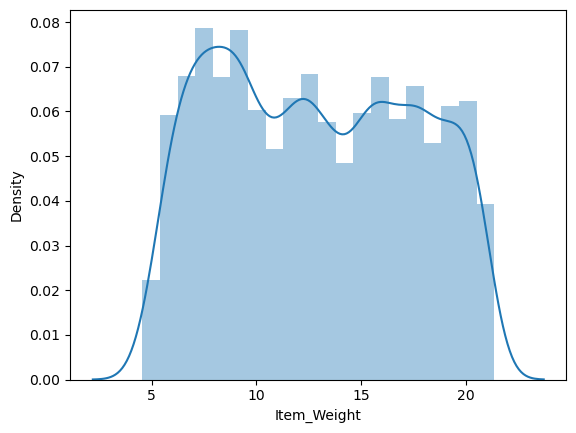

In [11]:
sns.distplot(train['Item_Weight'], kde=True)

In [12]:
train['Outlet_Size'].unique()

array(['Medium', nan, 'High', 'Small'], dtype=object)

In [13]:
train['Item_Fat_Content'].unique()

array(['Low Fat', 'Regular', 'low fat', 'LF', 'reg'], dtype=object)

In [14]:
train.select_dtypes('object').nunique()

Item_Identifier         1559
Item_Fat_Content           5
Item_Type                 16
Outlet_Identifier         10
Outlet_Size                3
Outlet_Location_Type       3
Outlet_Type                4
dtype: int64

# Preprocessing and feature Engineering

In [34]:
from sklearn.impute import SimpleImputer

In [35]:
si = SimpleImputer()

In [17]:
np.array(train['Item_Weight']).reshape(-1,1)

array([[ 9.3 ],
       [ 5.92],
       [17.5 ],
       ...,
       [10.6 ],
       [ 7.21],
       [14.8 ]])

In [18]:
np.array(test['Item_Weight']).reshape(-1,1)

array([[20.75],
       [ 8.3 ],
       [14.6 ],
       ...,
       [10.  ],
       [15.3 ],
       [ 9.5 ]])

In [19]:
a1 = si.fit_transform(np.array(test['Item_Weight']).reshape(-1,1))

In [20]:
a = si.fit_transform(np.array(train['Item_Weight']).reshape(-1,1))

In [21]:
train['impute_item_weight'] = a.flatten().tolist()

In [22]:
test['impute_item_weight'] = a1.flatten().tolist()

In [23]:
train.isna().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
impute_item_weight              0
dtype: int64

In [24]:
from sklearn.preprocessing import OrdinalEncoder, LabelEncoder

In [25]:
oe = OrdinalEncoder()

In [26]:
b = oe.fit_transform(np.array(train['Outlet_Size']).reshape(-1,1))

In [27]:
b.flatten().tolist()

[1.0,
 1.0,
 1.0,
 nan,
 0.0,
 1.0,
 0.0,
 1.0,
 nan,
 nan,
 1.0,
 2.0,
 1.0,
 2.0,
 0.0,
 2.0,
 1.0,
 1.0,
 1.0,
 2.0,
 0.0,
 1.0,
 2.0,
 2.0,
 2.0,
 nan,
 2.0,
 0.0,
 nan,
 2.0,
 nan,
 1.0,
 1.0,
 nan,
 2.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 2.0,
 0.0,
 1.0,
 1.0,
 0.0,
 nan,
 nan,
 nan,
 2.0,
 2.0,
 2.0,
 0.0,
 0.0,
 nan,
 nan,
 1.0,
 nan,
 1.0,
 2.0,
 2.0,
 1.0,
 nan,
 1.0,
 2.0,
 1.0,
 nan,
 2.0,
 nan,
 nan,
 2.0,
 2.0,
 0.0,
 nan,
 nan,
 1.0,
 2.0,
 1.0,
 2.0,
 nan,
 nan,
 2.0,
 2.0,
 1.0,
 2.0,
 1.0,
 nan,
 2.0,
 1.0,
 2.0,
 1.0,
 nan,
 1.0,
 nan,
 2.0,
 2.0,
 2.0,
 1.0,
 2.0,
 1.0,
 2.0,
 nan,
 1.0,
 1.0,
 0.0,
 1.0,
 0.0,
 0.0,
 nan,
 2.0,
 0.0,
 2.0,
 nan,
 2.0,
 1.0,
 nan,
 1.0,
 nan,
 2.0,
 nan,
 1.0,
 nan,
 nan,
 nan,
 2.0,
 nan,
 2.0,
 2.0,
 nan,
 0.0,
 nan,
 1.0,
 2.0,
 1.0,
 nan,
 1.0,
 2.0,
 1.0,
 nan,
 nan,
 nan,
 2.0,
 nan,
 nan,
 1.0,
 2.0,
 1.0,
 2.0,
 2.0,
 2.0,
 2.0,
 nan,
 1.0,
 1.0,
 1.0,
 2.0,
 1.0,
 1.0,
 nan,
 nan,
 0.0,
 0.0,
 1.0,
 1.0,
 2.0,
 2.0,
 nan,
 nan

In [28]:
train['encoding_outlet_size'] = b.tolist()

In [29]:
le = LabelEncoder()

In [30]:
b1 = le.fit_transform(train['Outlet_Size'])

In [31]:
b2 = le.fit_transform(test['Outlet_Size'])

In [32]:
train['label_outlet_size'] = b1.flatten().tolist()

In [33]:
test['label_outlet_size'] = b2.flatten().tolist()

In [34]:
train['Outlet_Location_Type'].unique()

array(['Tier 1', 'Tier 3', 'Tier 2'], dtype=object)

In [35]:
train['Outlet_Type'].unique()

array(['Supermarket Type1', 'Supermarket Type2', 'Grocery Store',
       'Supermarket Type3'], dtype=object)

In [36]:
train['Item_Fat_Content'].unique()

array(['Low Fat', 'Regular', 'low fat', 'LF', 'reg'], dtype=object)

In [37]:
train['ordinal_Outlet_Location_Type'] = oe.fit_transform(np.array(train['Outlet_Location_Type']).reshape(-1,1)).flatten().tolist()

In [38]:
test['ordinal_Outlet_Location_Type'] = oe.fit_transform(np.array(test['Outlet_Location_Type']).reshape(-1,1)).flatten().tolist()

In [39]:
train['ordinal_Outlet_Type'] = oe.fit_transform(np.array(train['Outlet_Type']).reshape(-1,1)).flatten().tolist()

In [40]:
test['ordinal_Outlet_Type'] = oe.fit_transform(np.array(test['Outlet_Type']).reshape(-1,1)).flatten().tolist()

In [41]:
train['label_Item_Fat_Content'] = le.fit_transform(train['Item_Fat_Content'])

In [42]:
test['label_Item_Fat_Content'] = le.fit_transform(test['Item_Fat_Content'])

In [43]:
from category_encoders import MEstimateEncoder

In [55]:
mt = MEstimateEncoder(cols=['Item_Type'],m=5.0)

In [45]:
x = train.copy()
y = x.pop('Item_MRP')

In [56]:
x1 = test.copy()
y1 = x1.pop('Item_MRP')

In [46]:
x_encode = x.sample(frac=0.25)
y_encode = y[x_encode.index]

In [57]:
x1_encode = x1.sample(frac=0.25)
y1_encode = y1[x1_encode.index]

In [47]:
x_pretrain = x.drop(x_encode.index)
y_pretrain = y[x_pretrain.index]

In [58]:
x1_pretrain = x1.drop(x1_encode.index)
y1_pretrain = y1[x1_pretrain.index]

In [52]:
mt.fit(x_encode,y_encode)

MEstimateEncoder(cols=['Outlet_Identifier'], m=5.0)

In [63]:
mt.fit(x1_encode,y1_encode)

MEstimateEncoder(cols=['Outlet_Identifier'], m=5.0)

In [53]:
y_train = mt.transform(x_pretrain)

In [64]:
y1_train = mt.transform(x1_pretrain)

In [49]:
x_train = mt.transform(x_pretrain)

In [60]:
x1_train = mt.transform(x1_pretrain)

In [62]:
mt = MEstimateEncoder(cols=['Outlet_Identifier'],m=5.0)

In [50]:
train['target_Item_Type'] = x_train['Item_Type']

In [61]:
test['target_Item_Type'] = x1_train['Item_Type']

In [54]:
train['target_Outlet_Identifier'] = y_train['Outlet_Identifier']

In [65]:
test['target_Outlet_Identifier'] = y1_train['Outlet_Identifier']

In [66]:
train['impute_target_item_type'] = si.fit_transform(np.array(train['target_Item_Type']).reshape(-1,1)).flatten().tolist()

In [67]:
test['impute_target_item_type'] = si.fit_transform(np.array(test['target_Item_Type']).reshape(-1,1)).flatten().tolist()

In [68]:
train['impute_target_Outlet_Identifier'] = si.fit_transform(np.array(train['target_Outlet_Identifier']).reshape(-1,1)).flatten().tolist()

In [69]:
test['impute_target_Outlet_Identifier'] = si.fit_transform(np.array(test['target_Outlet_Identifier']).reshape(-1,1)).flatten().tolist()

In [70]:
train1 = train.copy()

In [71]:
test1 = test.copy()

In [72]:
train1.set_index('Item_Identifier',inplace=True)

In [73]:
test1.set_index('Item_Identifier',inplace=True)

In [70]:
train1.columns

Index(['Item_Weight', 'Item_Fat_Content', 'Item_Visibility', 'Item_Type',
       'Item_MRP', 'Outlet_Identifier', 'Outlet_Establishment_Year',
       'Outlet_Size', 'Outlet_Location_Type', 'Outlet_Type',
       'Item_Outlet_Sales', 'impute_item_weight', 'encoding_outlet_size',
       'label_outlet_size', 'ordinal_Outlet_Location_Type',
       'ordinal_Outlet_Type', 'label_Item_Fat_Content', 'target_Item_Type',
       'target_Outlet_Identifier', 'impute_target_item_type',
       'impute_target_Outlet_Identifier'],
      dtype='object')

In [74]:
train1.drop(columns=['Item_Weight','Item_Fat_Content','Item_Type','Outlet_Identifier','Outlet_Size','Outlet_Location_Type','Outlet_Type','encoding_outlet_size','target_Item_Type','target_Outlet_Identifier'],inplace=True)

In [75]:
test1.drop(columns=['Item_Weight','Item_Fat_Content','Item_Type','Outlet_Identifier','Outlet_Size','Outlet_Location_Type','Outlet_Type','target_Item_Type','target_Outlet_Identifier'],inplace=True)

In [320]:
test1.drop('label_outlet_size',axis=1,inplace=True)

In [110]:
test1.columns

Index(['Item_Weight', 'Item_Fat_Content', 'Item_Visibility', 'Item_Type',
       'Item_MRP', 'Outlet_Identifier', 'Outlet_Establishment_Year',
       'Outlet_Size', 'Outlet_Location_Type', 'Outlet_Type',
       'impute_item_weight', 'label_outlet_size',
       'ordinal_Outlet_Location_Type', 'ordinal_Outlet_Type',
       'label_Item_Fat_Content', 'target_Item_Type',
       'target_Outlet_Identifier', 'impute_target_item_type',
       'impute_target_Outlet_Identifier'],
      dtype='object')

In [73]:
train1.isna().sum()

Item_Visibility                    0
Item_MRP                           0
Outlet_Establishment_Year          0
Item_Outlet_Sales                  0
impute_item_weight                 0
label_outlet_size                  0
ordinal_Outlet_Location_Type       0
ordinal_Outlet_Type                0
label_Item_Fat_Content             0
impute_target_item_type            0
impute_target_Outlet_Identifier    0
dtype: int64

In [86]:
X = train1.drop('Item_Outlet_Sales',axis=1)

In [87]:
Y = train1[['Item_Outlet_Sales']]

# Model ceation and Evaluation

In [112]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor

In [87]:
from sklearn.model_selection import train_test_split, cross_val_score, KFold, RandomizedSearchCV

In [109]:
x_train,x_test,y_train,y_test = train_test_split(X,Y,test_size=0.3,random_state=0)

In [110]:
lr = LinearRegression()
rr = RandomForestRegressor()

In [116]:
lr.fit(x_train,y_train)

LinearRegression()

In [111]:
rr.fit(x_train,y_train)

RandomForestRegressor()

In [117]:
pred = rr.predict(x_test)
pred1 = lr.predict(x_test)

In [88]:
from sklearn.metrics import r2_score

In [115]:
r2_score(y_test,pred)

0.5596426216967069

In [118]:
r2_score(y_test,pred1)

0.5017137173513273

In [206]:
from sklearn.linear_model import Ridge, Lasso

In [223]:
rd = Ridge(alpha=200,max_iter=100,tol=0.1)

In [132]:
la = Lasso(alpha=10)

In [224]:
rd.fit(x1_train,y1_train)

Ridge(alpha=200, max_iter=100, tol=0.1)

In [225]:
rd_pred = rd.predict(x1_test)

In [226]:
r2_score(y1_test,rd_pred)

0.5106025682402744

In [133]:
la.fit(x_train,y_train)

Lasso(alpha=10)

In [134]:
pred_la = la.predict(x_test)

In [144]:
pred_rd = rd.predict(x_test)

In [135]:
pred_la

array([2216.38446832, 2455.42175305, 1844.22382326, ..., 2451.01665817,
       2280.7596346 , 2247.1888739 ])

In [136]:
r2_score(y_test,pred_la)

0.49802256211028373

In [145]:
r2_score(y_test,pred_rd)

0.4998414946220098

In [76]:
train2 = train.copy()

In [77]:
train2['Outlet_Size'] = train2['Outlet_Size'].fillna('Medium')

In [78]:
train2['label1_outllet_size'] = le.fit_transform(train2['Outlet_Size']).flatten().tolist()

In [79]:
train2.drop(columns=['Item_Weight','Item_Fat_Content','Item_Type','Outlet_Identifier','Outlet_Size','Outlet_Location_Type','Outlet_Type','encoding_outlet_size','target_Item_Type','target_Outlet_Identifier','label_outlet_size'],inplace=True)

In [80]:
train2.set_index('Item_Identifier',inplace=True)

In [89]:
X1 = train2.drop('Item_Outlet_Sales',axis=1)
Y1 = train2[['Item_Outlet_Sales']]

In [90]:
x1_train,x1_test,y1_train,y1_test = train_test_split(X1,Y1,test_size=0.3,random_state=0)

In [196]:
dr = DecisionTreeRegressor()

In [197]:
dr.fit(x1_train,y1_train)

DecisionTreeRegressor()

In [198]:
dr_predict = dr.predict(x1_test)

In [199]:
r2_score(y1_test,dr_predict)

0.20394893465654662

In [326]:
rr.fit(x1_train,y1_train)

RandomForestRegressor()

In [171]:
pred2 = rr.predict(x1_test)

In [172]:
r2_score(y1_test,pred2)

0.56144440501478

In [173]:
la.fit(x1_train,y1_train)

Lasso(alpha=10)

In [174]:
pred2_la = la.predict(x1_test)

In [175]:
r2_score(y1_test,pred2_la)

0.5123024982878164

In [187]:
train['miss_Outlet_size'] = train['Outlet_Size'].fillna('Medium')

In [82]:
test['miss_Outlet_size'] = test['Outlet_Size'].fillna('Medium')

In [188]:
train2['ordinal_outlet_size'] = oe.fit_transform(np.array(train['miss_Outlet_size']).reshape(-1,1)).flatten().tolist()

In [83]:
test1['label1_outllet_size'] = le.fit_transform(test['miss_Outlet_size']).flatten().tolist()

In [84]:
test1.drop('label_outlet_size',axis=1,inplace=True)

In [190]:
train2.drop('ordinal_outlet_size',axis=1,inplace=True)

In [115]:
from sklearn.ensemble import GradientBoostingRegressor, BaggingRegressor, AdaBoostRegressor

In [116]:
gb = GradientBoostingRegressor()
br = BaggingRegressor()
ad = AdaBoostRegressor()

In [254]:
ad.fit(x1_train,y1_train)

AdaBoostRegressor()

In [328]:
gb.fit(x1_train,y1_train)

GradientBoostingRegressor()

In [329]:
gb_pred = gb.predict(test1)

In [256]:
ad_pred = ad.predict(x1_test)

In [213]:
r2_score(y1_test,gb_pred)

0.5920480751212606

In [257]:
r2_score(y1_test,ad_pred)

0.5098921963802379

In [235]:
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor

In [248]:
sr = SVR()
kn = KNeighborsRegressor(n_neighbors=20)

In [249]:
kn.fit(x1_train,y1_train)

KNeighborsRegressor(n_neighbors=20)

# Cross val score and hyper tuning parameter

In [263]:
score = cross_val_score(gb,X1,Y1,cv=KFold(10))

In [264]:
score.mean()

0.593328664219376

In [265]:
Parameter = {'loss':['squared_error', 'absolute_error', 'huber', 'quantile'],'n_estimators':[50,100,150,200],'criterion':['friedman_mse', 'squared_error'],'max_depth':[1,3,6,9],'max_features':['auto', 'sqrt', 'log2']}

In [268]:
Ramcv = RandomizedSearchCV(gb, param_distributions=Parameter,cv=KFold(5))

In [271]:
Ramcv.fit(x1_train,y1_train)

RandomizedSearchCV(cv=KFold(n_splits=5, random_state=None, shuffle=False),
                   estimator=GradientBoostingRegressor(),
                   param_distributions={'criterion': ['friedman_mse',
                                                      'squared_error'],
                                        'loss': ['squared_error',
                                                 'absolute_error', 'huber',
                                                 'quantile'],
                                        'max_depth': [1, 3, 6, 9],
                                        'max_features': ['auto', 'sqrt',
                                                         'log2'],
                                        'n_estimators': [50, 100, 150, 200]})

In [272]:
Ramcv.best_params_

{'n_estimators': 100,
 'max_features': 'sqrt',
 'max_depth': 3,
 'loss': 'huber',
 'criterion': 'squared_error'}

In [273]:
Ramcv.best_score_

0.5911692481159208

In [274]:
ram_pred = Ramcv.predict(x1_test)

In [275]:
r2_score(y1_test,ram_pred)

0.5922443487922797

# Gradient boosting regressor gives better prediction

In [343]:
gb.predict(test1)

array([1685.12431535, 1435.48128003,  558.37802541, ..., 1993.48139847,
       3860.06492259, 1364.17644415])

<Axes: >

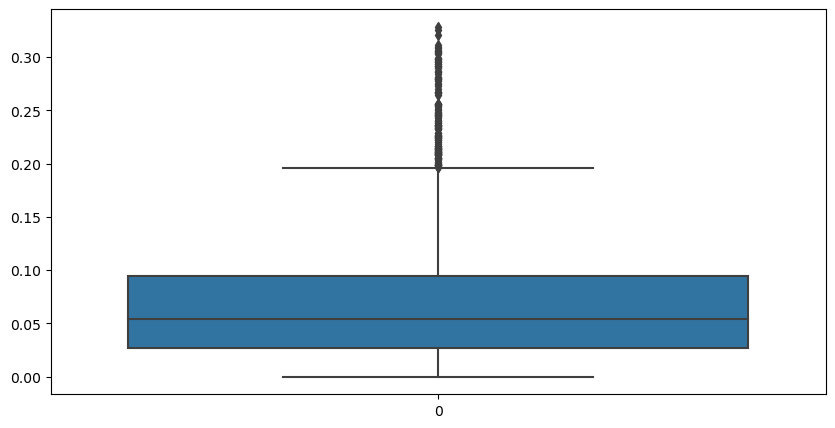

In [107]:
plt.figure(figsize=(10,5))
sns.boxplot(train['Item_Visibility'])

In [109]:
train3 = train2.copy()

In [99]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler

In [100]:
ss =  StandardScaler()
mm = MinMaxScaler()

In [120]:
train3['Item_Visibility'] = mm.fit_transform(np.array(train3['Item_Visibility']).reshape(-1,1)).flatten().tolist()

<Axes: >

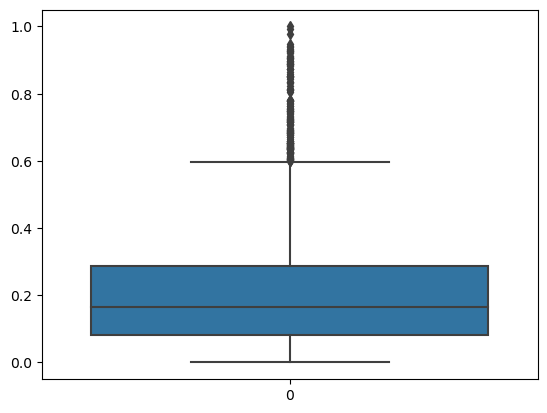

In [123]:
sns.boxplot(train3['Item_Visibility'])

In [2]:
pip install xgboost

     --------------------------------------- 70.9/70.9 MB 30.0 kB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [91]:
import xgboost

In [92]:
from xgboost import XGBRegressor

In [93]:
xg = XGBRegressor()

In [94]:
xg.fit(x1_train,y1_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...)

In [95]:
xg_pred = xg.predict(x1_test)

In [96]:
xg_pred

array([2607.2341, 1535.2609, 2412.6748, ..., 1391.9614, 2469.3672,
       2952.368 ], dtype=float32)

In [97]:
r2_score(y1_test,xg_pred)

0.5272202047293408

In [106]:
x1_train['Item_MRP']= mm.fit_transform(np.array(x1_train['Item_MRP']).reshape(-1,1)).flatten().tolist()
x1_train['impute_item_weight']= mm.fit_transform(np.array(x1_train['impute_item_weight']).reshape(-1,1)).flatten().tolist()
x1_train['impute_target_item_type'] = mm.fit_transform(np.array(x1_train['impute_target_item_type']).reshape(-1,1)).flatten().tolist()
x1_train['impute_target_Outlet_Identifier'] = mm.fit_transform(np.array(x1_train['impute_target_Outlet_Identifier']).reshape(-1,1)).flatten().tolist()


In [107]:
x1_test['Item_MRP']= mm.fit_transform(np.array(x1_test['Item_MRP']).reshape(-1,1)).flatten().tolist()
x1_test['impute_item_weight']= mm.fit_transform(np.array(x1_test['impute_item_weight']).reshape(-1,1)).flatten().tolist()
x1_test['impute_target_item_type'] = mm.fit_transform(np.array(x1_test['impute_target_item_type']).reshape(-1,1)).flatten().tolist()
x1_test['impute_target_Outlet_Identifier'] = mm.fit_transform(np.array(x1_test['impute_target_Outlet_Identifier']).reshape(-1,1)).flatten().tolist()


In [120]:
gb.fit(x1_train,y1_train)

GradientBoostingRegressor()

In [121]:
pred_xg = gb.predict(x1_test)

In [122]:
r2_score(y1_test,pred_xg)

0.5974813806430788

In [15]:
train['Outlet_Size'].factorize()

(array([0, 0, 0, ..., 2, 0, 2], dtype=int64),
 Index(['Medium', 'High', 'Small'], dtype='object'))

In [16]:
train_miscore = train.copy()

In [17]:
x2 = train.copy()
y2 = x2.pop('Item_Outlet_Sales')

In [19]:
for i in train_miscore.select_dtypes('object'):
    x2[i],_ = x2[i].factorize()

In [37]:
x2['Item_Weight'] = si.fit_transform(np.array(x2['Item_Weight']).reshape(-1,1)).flatten().tolist()

In [44]:
discrete_feature = x2.dtypes == 'int64'

In [45]:
from sklearn.feature_selection import mutual_info_regression

In [46]:
def mi_score(x2,y2,discrete_feature):
    mi_score = mutual_info_regression(x2,y2,discrete_features=discrete_feature)
    mi_score = pd.Series(mi_score,name='mi_score',index=x2.columns)
    mi_score = mi_score.sort_values(ascending=False)
    return mi_score

# Feature Evaluation

In [47]:
mi_score = mi_score(x2,y2,discrete_feature)

In [48]:
mi_score

Item_MRP                     0.763179
Item_Identifier              0.269653
Outlet_Type                  0.267473
Outlet_Identifier            0.252321
Outlet_Establishment_Year    0.157674
Item_Visibility              0.084203
Item_Weight                  0.075483
Item_Type                    0.056552
Outlet_Size                  0.042940
Outlet_Location_Type         0.038545
Item_Fat_Content             0.019236
Name: mi_score, dtype: float64